# Lab 6 Confidence intervals
Haowen Guan

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
plt.rcParams["figure.figsize"] = (15,10)

## Setup the background

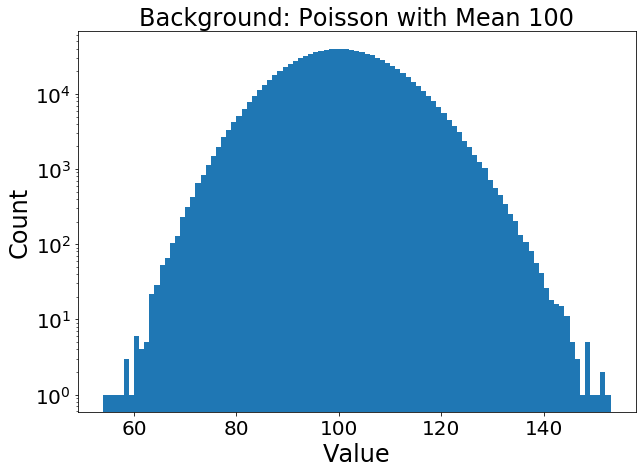

In [34]:
background = stats.poisson.rvs(mu = 100, loc = 0, size = 1000000)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,7)
ax.hist(background,99)
plt.tick_params(labelsize = 24)
x = np.linspace(-3,3,256)
plt.yscale("log")
plt.title("Background: Poisson with Mean 100", fontsize=24)
plt.tick_params(labelsize = 20)
plt.ylabel("Count", fontsize=24)
plt.xlabel("Value", fontsize=24)
plt.show()

## Problem 1
<br> The +- 5-sigma threshold for a mean 100 poisson can be find using the following function, my approach is to use the percentile that corresponds to sigma value.

In [48]:
def get_threshold(sigma: int):
    print(stats.poisson.ppf(stats.norm.cdf(sigma),mu = 100))
get_threshold(5)
get_threshold(8)

154.0
190.0


## Problem 2
Since 8 sigma is about 190, and the mean value of the poisson is 100, I will add a signal strength of 190 to the background to achieve a sigma 8 in the distribution.

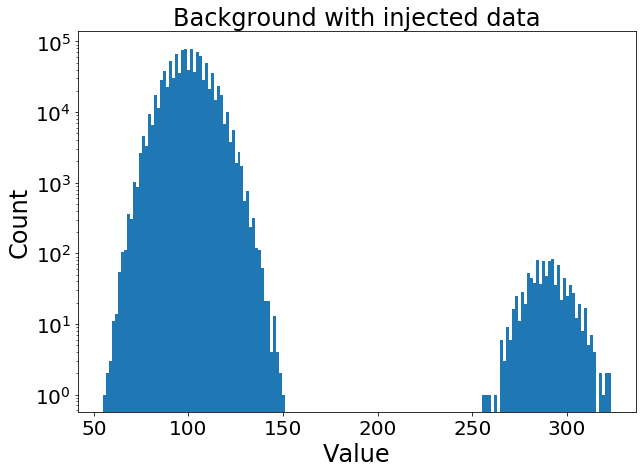

In [56]:
signal = stats.poisson.rvs(mu = 100, loc = 0, size = 1000) + 190
data = np.append(background, signal)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,7)
ax.hist(data,170)
plt.tick_params(labelsize = 24)
x = np.linspace(-3,3,256)
plt.yscale("log")
plt.title("Background with injected data", fontsize=24)
plt.tick_params(labelsize = 20)
plt.ylabel("Count", fontsize=24)
plt.xlabel("Value", fontsize=24)
plt.show()

<br> **a)** It looks significantly brighter than the background, that we could easily distinguish the signal.
<br> **b)** Since my injected signal was to add a 190 offset to the background, and resulting signal seems centered at 290, so, my observed value is biased in the way that it is equally stronger.
<br> The signal distribution is pretty symmetric.

## Problem 3

In [60]:
background = stats.poisson.rvs(mu = 100, loc = 0, size = 1000000)
signal = stats.uniform.rvs(loc=0, scale=300, size=1000000)
total = np.add(background,signal)

### **a)** 
In this problem, I am simulating the distribution of observed data with a varied injected signal.

Text(0.5, 0, 'Observed data, $P(d|s)$')

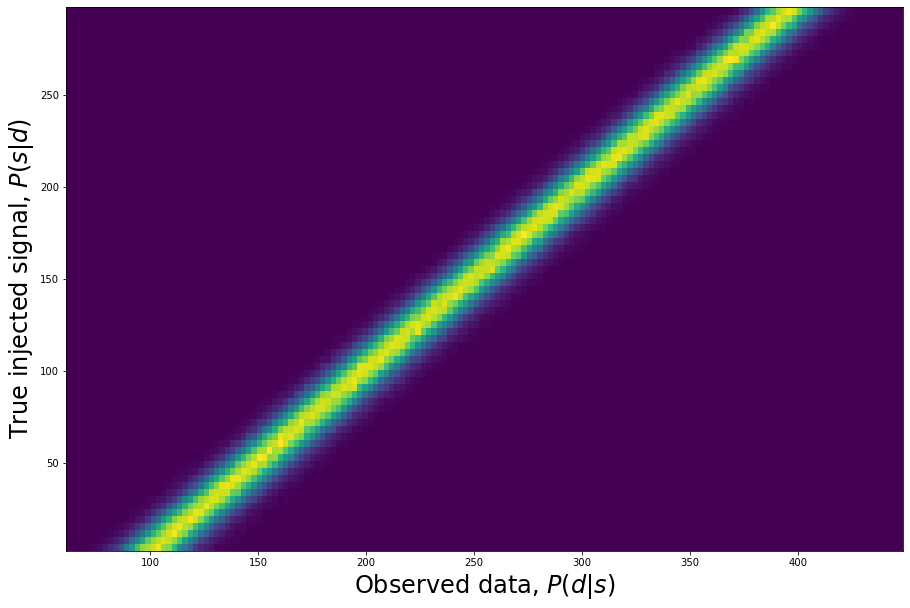

In [61]:
data = total.data

signaledges = np.linspace(0,300,80)
dataedges = np.linspace(60,450,160)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

### **b)** 
Below is the oberved data for injected signal of 190.

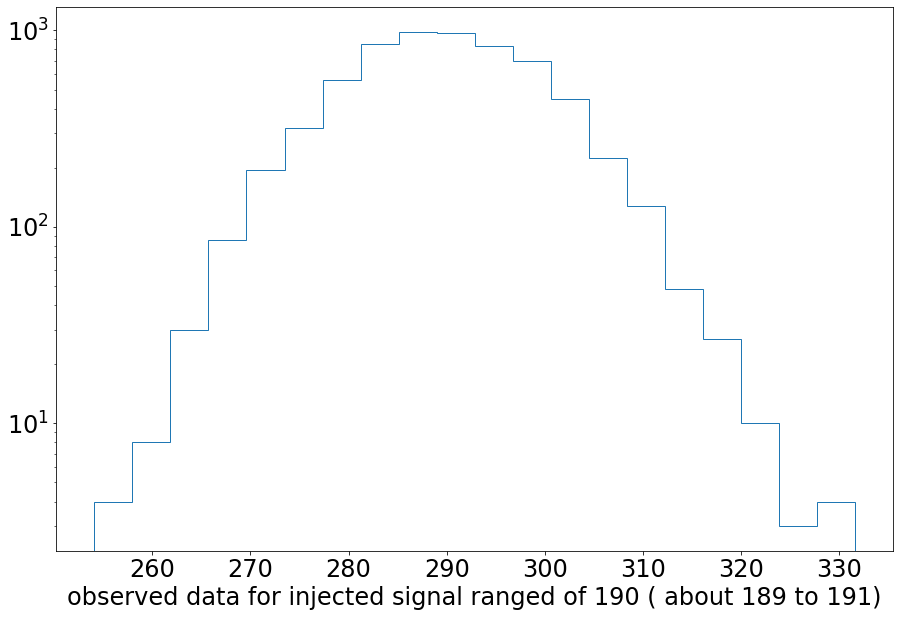

In [63]:
d1 = []
for i in range(1000000):
    if signal[i] > 189 and signal[i] < 191:
        d1.append(data[i])

ax = plt.hist(d1, 20, histtype=u'step')
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.xlabel("observed data for injected signal ranged of 190 ( about 189 to 191)", fontsize=24)
plt.show()

**The distribution of this observed data is same as injected signal distribution we found in problem 2.**

### **c)**
I picked the observed value to be 200.

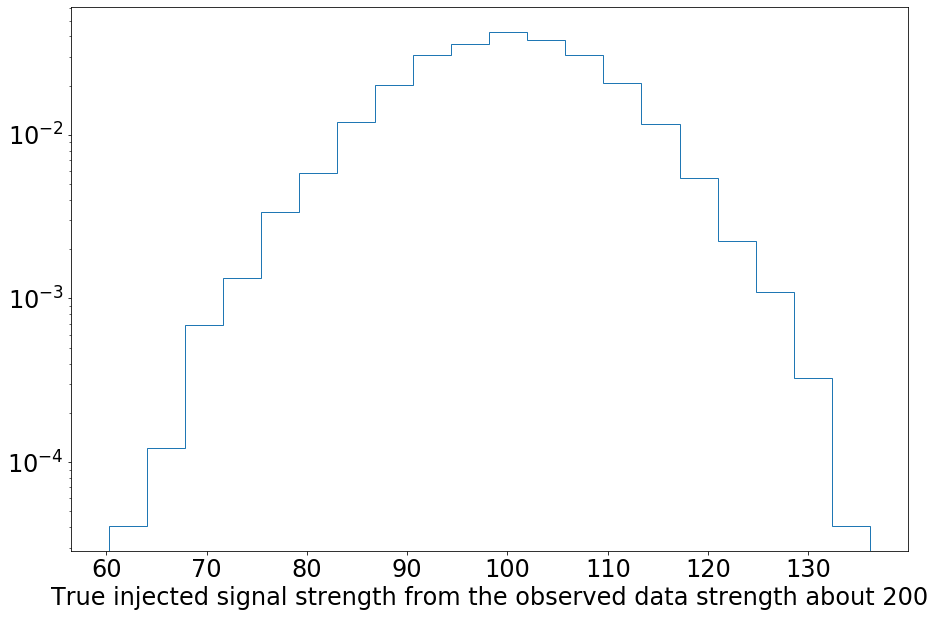

In [67]:
d2 = []
for i in range(1000000):
    if data[i] > 199 and data[i] < 201:
        d2.append(signal[i])

ax = plt.hist(d2, 20, histtype=u'step', density = True)
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.xlabel("True injected signal strength from the observed data strength about 200", fontsize=24)
plt.show()

**This histogram is representing the range and the occurance of injectd signal that eventually yield a observed data strength of 200.**

### **d)**

In [70]:
print("lower bound (-1 sigma which correspond to 15.85 percentile) is ", np.percentile(d2, 15.85))
print("lower bound (1 sigma which correspond to 84.15 percentile) is ", np.percentile(d2, 84.15))

lower bound (-1 sigma which correspond to 15.85 percentile) is  90.30207154732368
lower bound (1 sigma which correspond to 84.15 percentile) is  109.57273572744663


1 sigma uncertainty of true signal is from **90.3 to 109.57**

### **e)**
<br> It is not exactly symmetric, it looks a little bit like a mirror poisson distribution and it is biasing to the bigger value of true injected signal.
<br> This observation make sense to me，since the original background is poisson distributed. Poisson distribution normally bias to the small value. Therefore, to reach a same observed value, there are more cases of a smaller background plus a bigger true signal than a bigger background plus a smaller true signal.